In [ ]:
using PyPlot

In [2]:
using RungeKutta

# Oscilador armónico bidimensional

In [3]:
# Constantes

m=1;

#k1=1.0; #constante del resorte en x
#k2=1.0; #constante del resorte en y

#w1=sqrt(k1/m);
#w2=sqrt(k2/m);

w1=3
w2=4

delta=pi/2;
alfa=pi/2;

A=1;
B=1;

|   Parámetros	|   Curva	|
|---	|---	|
|   $ω_2=ω_1=1$	$δ=0$|  Recta	|
|   $A=B$;$ω_2=ω_1=1$;$δ=π/2$	|   Circunferencia  	|
|   $A≠B$;$ω_2=ω_1=1$;$δ=π/2$	|   Elipse	|
|   $ω_2=ω_1=2$;$δ=π/2$ 	|    Sección de una parábola	|

Otros casos interesantes:

| Parámetros  | 
|---|
|   $A=B$; $ω_1=3$; $ω_2=4$;$α=δ$ | 
|   $A=B$; $ω_1=2ω_2$;$δ=0$ | 
|   $A=B$; $ω_1=2ω_2$;$δ=π/3$ |
|   $A=B$; $ω_1=2ω_2$;$δ=π/2$

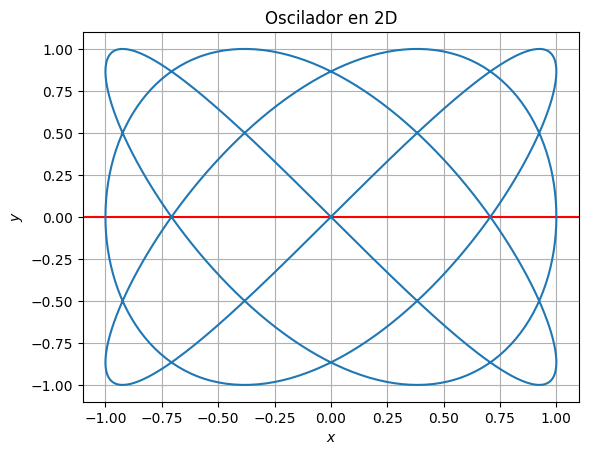

In [4]:
t = linspace(0, 2*pi, 1000); #periodo de  0 a 2pi

x=[]
y=[]

for i=1:length(t)
    valx=A*cos(w1*t[i]+delta)
    x=push!(x,valx)   
    
    valy=B*cos(w2*t[i]+alfa)
    y=push!(y,valy)   
end 

#Gráfica

title("Oscilador en 2D")#Título de la gráfica
xlabel("\$x\$") #Etiqueta para el eje X
ylabel("\$y\$")#Etiqueta para el eje Y
 
axhline(0, color="red") 
grid() #malla

plot(x,y)
 
show()

----

# Oscilador amortiguado

|   Caso	|   Relación	| 
|---	|---	|
        |   Amortiguado	| $ω^2 >β^2$ 	|   
|   Crítico	|    $ω^2 =β^2$	|   
|  Sobreamortiguado 	|    $ω^2 <β^2$	|   

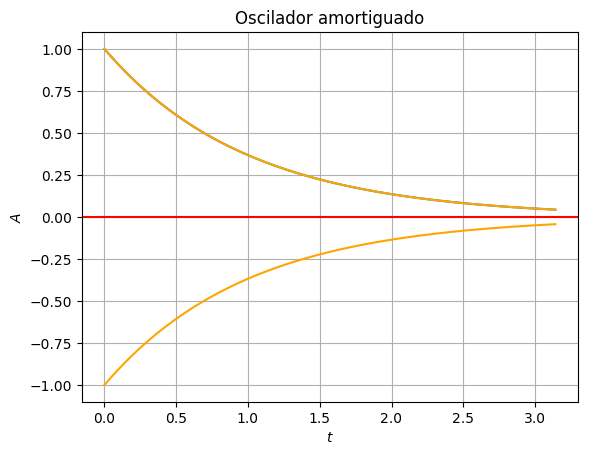

In [5]:
t = linspace(0, pi, 1000);

betha=1#2 caso sobreamortiguado 
wo=1#1

c1=0.5#-1
c2=0.5#2

omega=sqrt(complex(betha^2-wo^2))

x1=[]
envolvente=[]

for i=1:length(t)
    #ENVOLVENTE
    A=exp(-betha*t[i])
    envolvente=push!(envolvente,A)
    
    #OSCILACIÓN
    valx1=exp(-betha*t[i])*(c1*exp(omega*t[i])+c2*exp(-omega*t[i]))
    x1=push!(x1,valx1)

end 

title("Oscilador amortiguado")#Título de la gráfica
xlabel("\$t\$") #Etiqueta para el eje X
ylabel("\$A\$")#Etiqueta para el eje Y
 
axhline(0, color="red") 
grid() #malla

plot(t,x1)

plot(t,envolvente,color="orange")#envolvente superior
plot(t,-envolvente,color="orange")#envolvente inferior
 
show()

## Espacio fase

Recordemos que

|   Caso	|   Relación	| 
|---	|---	|
        |   Amortiguado	| $ω^2 >β^2$ 	|   
|   Crítico	|    $ω^2 =β^2$	|   
|  Sobreamortiguado 	|    $ω^2 <β^2$	|   

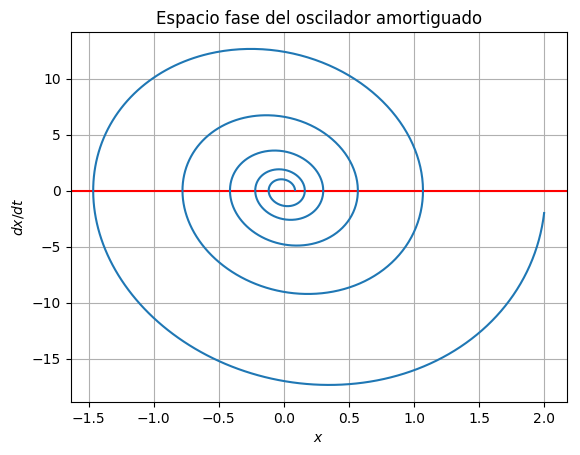

In [7]:
t = linspace(0, pi, 2000);

betha=1
wo=10

c1=1
c2=1

omega=sqrt(complex(betha^2-wo^2))

x1=[]
y1=[]

for i=1:length(t)
    #Posición
    valx1=exp(-betha*t[i])*(c1*exp(omega*t[i])+c2*exp(-omega*t[i]))
    x1=push!(x1,valx1) 
    
    #Velocidad    
    valy1=-betha*exp(-betha*t[i])*(c1*exp(omega*t[i])+c2*exp(-omega*t[i]))+exp(-betha*t[i])*(c1*omega*exp(omega*t[i])-c2*omega*exp(-omega*t[i]))
    y1=push!(y1,valy1)   
    
end 

title("Espacio fase del oscilador amortiguado")#Título de la gráfica
xlabel("\$x\$") #Etiqueta para el eje X
ylabel("\$dx/dt\$")#Etiqueta para el eje Y
 
axhline(0, color="red") 
grid() #malla

plot(x1,y1)
 
show()

--------

A partir del siguiente código podemos hacer una función para facilitar la generación del espacio fase cambiando los parámetros del oscilador. 

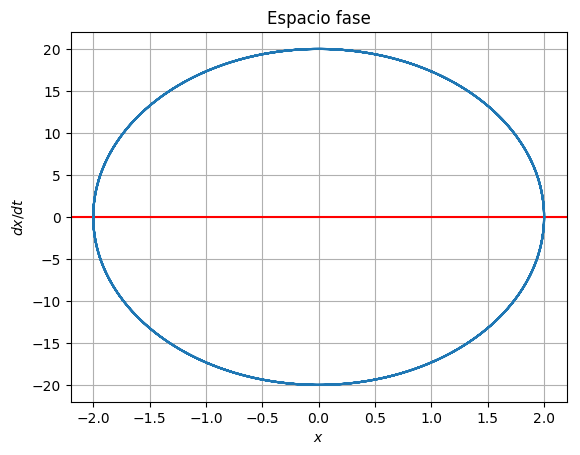

In [9]:
t = linspace(0, pi, 2000);

betha=0
wo=10

c1=1
c2=1

omega=sqrt(complex(betha^2-wo^2))

x1=[]
y1=[]

for i=1:length(t)
    #Posición
    valx1=exp(-betha*t[i])*(c1*exp(omega*t[i])+c2*exp(-omega*t[i]))
    x1=push!(x1,valx1) 
    
    #Velocidad    
    valy1=-betha*exp(-betha*t[i])*(c1*exp(omega*t[i])+c2*exp(-omega*t[i]))+exp(-betha*t[i])*(c1*omega*exp(omega*t[i])-c2*omega*exp(-omega*t[i]))
    y1=push!(y1,valy1)   
    
end 

title("Espacio fase")#Título de la gráfica
xlabel("\$x\$") #Etiqueta para el eje X
ylabel("\$dx/dt\$")#Etiqueta para el eje Y
 
axhline(0, color="red") 
grid() #malla

plot(x1,y1)
 
show()

Escribimos la función con su documentación. 

In [10]:
doc"""
fase(betha,wo,c1,c2,t)

Esta función muestra la gráfica del espacio fase de un oscilador utilizando la expresión:

\$x(t) = e^{-\beta t}[A_1e^{\Omega t}+ A_2e^{-\Omega t}]\$

para la posición. Y para la velocidad:

\$\dot{x}(t) =  e^{-\beta t}[\Omega (c_1 e^{\Omega t}-c_2 e^{-\Omega t})-\beta (c_1 e^{\Omega t}+c_2 e^{-\Omega t})]\$

Donde 

\$\Omega=\sqrt{\beta^2-\omega_0^2}\$


Su estructura es la siguiente:

\$fase(\beta,\omega_0,c_1,c_2,t)\$

"""

function fase(betha,wo,c1,c2,t)
    
    omega=sqrt(complex(betha^2-wo^2))
    
x1=[]
y1=[]
   
for i=1:length(t)
    #Posición
    valx1=exp(-betha*t[i])*(c1*exp(omega*t[i])+c2*exp(-omega*t[i]))
    x1=push!(x1,valx1) 
    
    #Velocidad    
    valy1=exp(-betha*t[i])*(omega*(c1*exp(omega*t[i])-c2*exp(-omega*t[i]))-betha*(c1*exp(omega*t[i])+c2*exp(-omega*t[i])))
    y1=push!(y1,valy1)   
        
        
        
    
end 
    title("Espacio fase del oscilador")#Título de la gráfica
xlabel("\$x\$") #Etiqueta para el eje X
ylabel("\$dx/dt\$")#Etiqueta para el eje Y
 
axhline(0, color="red") 
grid() #malla
plot(x1,y1)
    
    return show()
end
    

fase

In [11]:
?fase

search: falses figaspect @fastmath rcdefaults findlast get_figlabels fieldnames



fase(betha,wo,c1,c2,t)

Esta función muestra la gráfica del espacio fase de un oscilador utilizando la expresión:

$x(t) = e^{-\beta t}[A_1e^{\Omega t}+ A_2e^{-\Omega t}]$

para la posición. Y para la velocidad:

$\dot{x}(t) =  e^{-\beta t}[\Omega (c_1 e^{\Omega t}-c_2 e^{-\Omega t})-\beta (c_1 e^{\Omega t}+c_2 e^{-\Omega t})]$

Donde 

$\Omega=\sqrt{\beta^2-\omega_0^2}$

Su estructura es la siguiente:

$fase(\beta,\omega_0,c_1,c_2,t)$


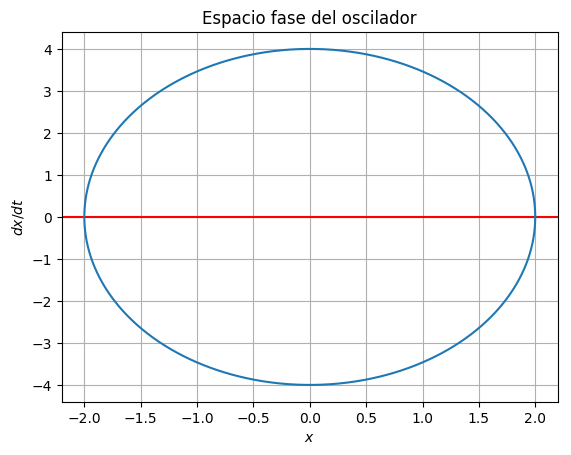

In [12]:
fase(0,2,1,1,linspace(0, pi, 2000))

# Péndulo Simple 

La ecuación de movimiento del péndulo simple es: 

 \begin{equation} \ddot{θ}=-\left(\frac{g}{l}\right)sin(θ) \end{equation} 
 
cuya solución analítica es:

 \begin{equation} θ(t)=θ_0 cos\left(\sqrt{\frac{g}{l}}t\right)  \end{equation} 

donde $\omega = \frac{2 \pi}{T}=\sqrt{\frac{g}{l}}$

Podemos obtener la solución numérica con el método de Runge-Kutta 4, el cual, resuelve ecuaciones diferenciales de primer orden, es decir, de la forma: 

 \begin{equation} \frac{\partial \vec{x}}{\partial t} =f(t,\vec{x}) \end{equation} 
 
Por lo tanto, debemos convertir la ecuación de movimiento del péndulo simple en un sistema de dos ecuaciones de primer orden como se muestra a continuación:

\begin{equation}
  \begin{cases} \frac{\partial \vec{θ}}{\partial t}=\vec{y}
             \\ 
             \\ \frac{\partial \vec{y}}{\partial t} = -\left(\frac{g}{l}\right)sin(\vec{θ})
  \end{cases}
\end{equation} 





In [13]:
function f1(θ)
    dθ=y
    return dθ
end

function f2(l,θ,g = 9.81)
    dy=-(g/l)*sin(θ)
    return dy
end

f2 (generic function with 2 methods)

# Referencias 

* http://fisica.eia.edu.co/wiki/index.php/Programación_en_Python:_El_Péndulo
* http://nbviewer.jupyter.org/url/sistemas.fciencias.unam.mx/~rich/herramientas/notebooks/Runge_Kutta.ipynb